In [2]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [7]:
import pandas_datareader as pdr
key="dd63b0c4b01634e50b4ef6728bf06af342ad2ec5"

In [8]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [9]:
df.to_csv('AAPL.csv')

In [10]:
import pandas as pd

In [11]:
df=pd.read_csv('AAPL.csv')

In [13]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2022-08-05 00:00:00+00:00,165.35,165.85,163.00,163.21,56696985,165.35,165.85,163.00,163.21,56696985,0.23,1.0
1254,AAPL,2022-08-08 00:00:00+00:00,164.87,167.81,164.20,166.37,60362338,164.87,167.81,164.20,166.37,60362338,0.00,1.0
1255,AAPL,2022-08-09 00:00:00+00:00,164.92,165.82,163.25,164.02,63135503,164.92,165.82,163.25,164.02,63135503,0.00,1.0
1256,AAPL,2022-08-10 00:00:00+00:00,169.24,169.34,166.90,167.68,70170540,169.24,169.34,166.90,167.68,70170540,0.00,1.0
1257,AAPL,2022-08-11 00:00:00+00:00,168.49,170.99,168.19,170.06,57149159,168.49,170.99,168.19,170.06,57149159,0.00,1.0


In [14]:
df1=df.reset_index()['close']

In [15]:
df1

0       159.85
1       161.60
2       160.95
3       157.86
4       157.50
         ...  
1253    165.35
1254    164.87
1255    164.92
1256    169.24
1257    168.49
Name: close, Length: 1258, dtype: float64

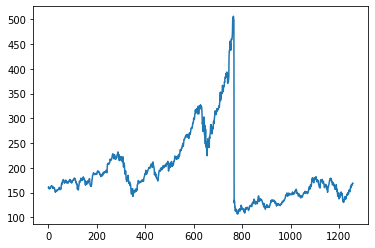

In [16]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [17]:

import numpy as np

In [18]:
df1

0       159.85
1       161.60
2       160.95
3       157.86
4       157.50
         ...  
1253    165.35
1254    164.87
1255    164.92
1256    169.24
1257    168.49
Name: close, Length: 1258, dtype: float64

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [20]:
print(df1)

[[0.13277395]
 [0.13715717]
 [0.13552912]
 ...
 [0.14547276]
 [0.15629305]
 [0.15441453]]


In [21]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [22]:
training_size,test_size

(817, 441)

In [23]:
train_data

array([[1.32773951e-01],
       [1.37157170e-01],
       [1.35529117e-01],
       [1.27789606e-01],
       [1.26887915e-01],
       [1.26161553e-01],
       [1.32598622e-01],
       [1.33099562e-01],
       [1.31321227e-01],
       [1.32798998e-01],
       [1.36831559e-01],
       [1.40438322e-01],
       [1.41540388e-01],
       [1.43168441e-01],
       [1.43293676e-01],
       [1.38359424e-01],
       [1.37933626e-01],
       [1.36305573e-01],
       [1.29718222e-01],
       [1.36906700e-01],
       [1.35303694e-01],
       [1.32273012e-01],
       [1.28841578e-01],
       [1.32849092e-01],
       [1.29818410e-01],
       [1.29968691e-01],
       [1.23306199e-01],
       [1.16593613e-01],
       [1.12836569e-01],
       [1.09480276e-01],
       [1.15967439e-01],
       [1.18697558e-01],
       [1.16318096e-01],
       [1.18422041e-01],
       [1.17645585e-01],
       [1.19323732e-01],
       [1.16819036e-01],
       [1.21603006e-01],
       [1.21377583e-01],
       [1.22730119e-01],


In [26]:
import numpy
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]    
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [27]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [28]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [29]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [30]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [46]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [47]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_13 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_14 (LSTM)              (None, 50)                20200     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 7s 222ms/step - loss: 0.0448 - val_loss: 0.0011
Epoch 2/100
12/12 [==============================] - 1s 118ms/step - loss: 0.0172 - val_loss: 0.0082
Epoch 3/100
12/12 [==============================] - 1s 123ms/step - loss: 0.0132 - val_loss: 7.1838e-04
Epoch 4/100
12/12 [==============================] - 2s 134ms/step - loss: 0.0105 - val_loss: 7.7587e-04
Epoch 5/100
12/12 [==============================] - 1s 123ms/step - loss: 0.0093 - val_loss: 4.6317e-04
Epoch 6/100
12/12 [==============================] - 1s 120ms/step - loss: 0.0084 - val_loss: 3.4879e-04
Epoch 7/100
12/12 [==============================] - 1s 121ms/step - loss: 0.0076 - val_loss: 3.8774e-04
Epoch 8/100
12/12 [==============================] - 1s 126ms/step - loss: 0.0073 - val_loss: 4.9710e-04
Epoch 9/100
12/12 [==============================] - 2s 137ms/step - loss: 0.0064 - val_loss: 3.0337e-04
Epoch 10/100
12/12 [==============================] - 1s 122ms/

In [49]:
import tensorflow as tf

In [50]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 23ms/step


In [51]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [52]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

238.52259110886587

In [53]:
math.sqrt(mean_squared_error(ytest,test_predict))

152.84971858554294

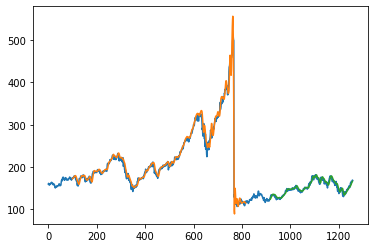

In [54]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [55]:
len(test_data)

441

In [56]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [57]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [58]:
temp_input

[0.14662492172824038,
 0.1552410770194113,
 0.1587226048841578,
 0.16839073262366933,
 0.17001878522229175,
 0.17222291797119593,
 0.18063869755792106,
 0.1776581089542893,
 0.16974326862867878,
 0.16899185973700687,
 0.1793362554790231,
 0.17087038196618654,
 0.16278021289918598,
 0.1635566687539135,
 0.158422041327489,
 0.14755165936130238,
 0.1523356293049467,
 0.15919849718221663,
 0.14639949906073885,
 0.1458484658735128,
 0.15168440826549778,
 0.15125860989355033,
 0.14922980588603624,
 0.13763306199123349,
 0.140363180964308,
 0.1251346274264245,
 0.12455854727614268,
 0.14226675015654344,
 0.12726361928616153,
 0.12804007514088916,
 0.13184721352536,
 0.14822792736380713,
 0.12505948653725735,
 0.12633688165309953,
 0.11326236693800873,
 0.11939887288666245,
 0.09933625547902314,
 0.08946775203506574,
 0.10086412022542268,
 0.09693174702567309,
 0.10619912335629306,
 0.08510958046336875,
 0.0764182842830306,
 0.07701941139636814,
 0.09084533500313086,
 0.08395742016280527,
 0.0

In [59]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
       
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.15321533]
101
1 day input [0.15524108 0.1587226  0.16839073 0.17001879 0.17222292 0.1806387
 0.17765811 0.16974327 0.16899186 0.17933626 0.17087038 0.16278021
 0.16355667 0.15842204 0.14755166 0.15233563 0.1591985  0.1463995
 0.14584847 0.15168441 0.15125861 0.14922981 0.13763306 0.14036318
 0.12513463 0.12455855 0.14226675 0.12726362 0.12804008 0.13184721
 0.14822793 0.12505949 0.12633688 0.11326237 0.11939887 0.09933626
 0.08946775 0.10086412 0.09693175 0.10619912 0.08510958 0.07641828
 0.07701941 0.09084534 0.08395742 0.08435817 0.09252348 0.107201
 0.10519724 0.10487163 0.11113338 0.096531   0.09843456 0.10487163
 0.10299311 0.08966813 0.07586725 0.0627176  0.06492173 0.07160927
 0.05815905 0.06191609 0.07271133 0.07140889 0.0787226  0.08721353
 0.08721353 0.07664371 0.08112711 0.07484033 0.0803757  0.08696306
 0.09036944 0.09896055 0.10068879 0.0952536  0.09773325 0.09680651
 0.10427051 0.10852849 0.10076393 0.11060739 0.11571697 0.12150282
 0.1183469  0.11549155 0.11211021 0.1

In [60]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [61]:
import matplotlib.pyplot as plt

In [62]:
len(df1)

1258

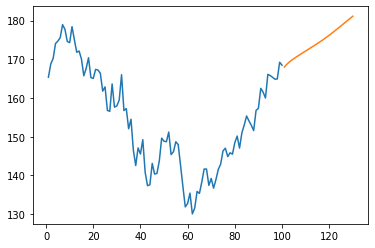

In [63]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

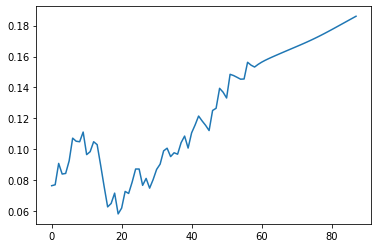

In [64]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [65]:
df3=scaler.inverse_transform(df3).tolist()

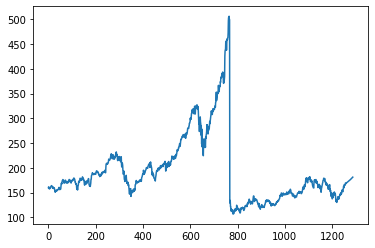

In [67]:
plt.plot(df3)